# Introduction

Graph colouring is the problem of assigning colours to vertices of a graph such that no two adjacent vertices share the same colour. This problem appears in many applications such as scheduling, frequency assignment, and resource allocation.

Determining the chromatic number (minimum number of colours needed) of a graph is NP-hard in general, so practical algorithms often rely on heuristics (approximate methods). One of the simplest and most commonly used heuristics is greedy colouring.



---


### Idea behind **Greedy Colouring**
The greedy colouring algorithm processes vertices in a fixed order
v1, v2, ..., vn and assigns to each vertex the smallest available colour that is not used by its already coloured neighbours.


---


### Key properties:

* Always produces a proper colouring

* Very fast and easy to implement

* The number of colours depends on the chosen vertex order

* Not necessarily optimal


---


### Justification of the Algorithm
When colouring a vertex v, only its already coloured neighbours restrict the choice of colour.

Since a vertex has at most deg(v) neighbours, at most that many colours are forbidden. Therefore, a new colour is always available.


#### The algorithm is greedy because:
> it makes a locally optimal choice (smallest possible colour)

> it never revises earlier decisions

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
# Helper functions
def print_dict(graph):
    for v in graph:
        print(v, ":", *graph[v])

def plot_coloring(graph, coloring):

    G = nx.Graph()

    # Add nodes to control order
    for v in graph:
        G.add_node(v)

    # Add edges
    for u in graph:
        for v in graph[u]:
            if u < v:  # avoid double edges
                G.add_edge(u, v)

    # Fix node order so colors match nodes
    nodes = list(G.nodes())
    node_colors = [coloring[v] for v in nodes]

    pos = nx.spring_layout(G, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        cmap=plt.cm.tab10,
        node_size=700,
        font_weight="bold"
    )

    plt.show()

# Greedy colouring algorithm
def greedy_coloring(graph, order=None):
    """
    Greedy vertex colouring.
    Returns a dictionary: vertex -> colour (positive integers).
    """
    if order is None:
        order = list(graph.keys())

    color = {}

    for v in order:
        # colours used by neighbours already coloured
        used = set(color[u] for u in graph[v] if u in color)

        # smallest positive integer not in used
        c = 1
        while c in used:
            c += 1

        color[v] = c

    return color

In [33]:
graph_dict = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3]
}

print_dict(graph_dict)

colors = greedy_coloring(graph_dict, order=[1, 2, 3, 4])
print(colors)

1 : 2 3
2 : 1 3
3 : 1 2 4
4 : 3
{1: 1, 2: 2, 3: 3, 4: 1}


We process vertices one by one. When colouring a vertex, only its already coloured neighbours matter. Choosing the smallest available colour guarantees the colouring remains proper. The number of colours used depends heavily on the chosen order of vertices.

Step-by-step explanation

Vertex 1

No coloured neighbours > we assign colour 1

Vertex 2

Neighbour 1 has colour 1 > we assign smallest free colour 2

Vertex 3

Neighbours 1 and 2 have colours 1 and 2 > we assign smallest free colour → 3

Vertex 4

Neighbour 3 has colour 3 > we assign colour 1

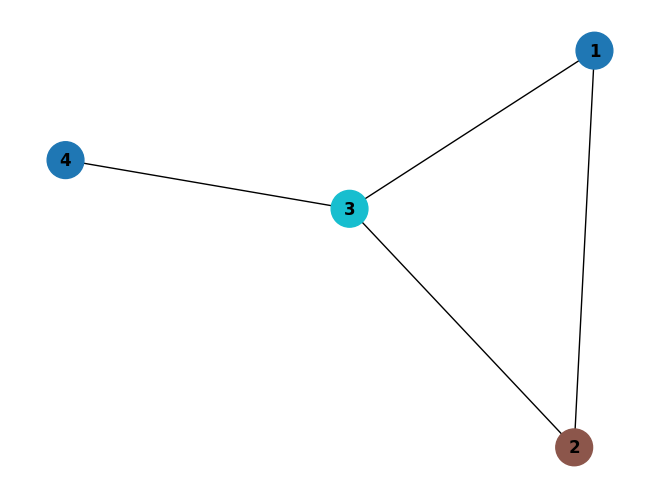

In [35]:
colors = greedy_coloring(graph_dict)
plot_coloring(graph_dict, colors)

In [69]:
graph_adv = {
    1: [2, 3, 4],
    2: [1, 3, 5],
    3: [1, 2, 6],
    4: [1, 5, 6],
    5: [2, 4, 6],
    6: [3, 4, 5]
}

print_dict(graph_adv)

1 : 2 3 4
2 : 1 3 5
3 : 1 2 6
4 : 1 5 6
5 : 2 4 6
6 : 3 4 5


In [70]:
order_bad = [1, 2, 3, 4, 5, 6]
colors_bad = greedy_coloring(graph_adv, order_bad)
print(colors_bad)
order_better = [1, 3, 5, 2, 4, 6]
colors_better = greedy_coloring(graph_adv, order_better)
print(colors_better)

{1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 4}
{1: 1, 3: 2, 5: 1, 2: 3, 4: 2, 6: 3}


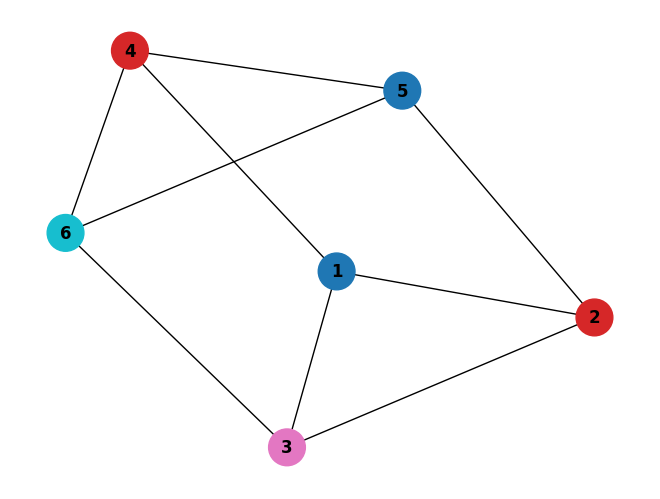

In [71]:
plot_coloring(graph_adv, colors_bad)

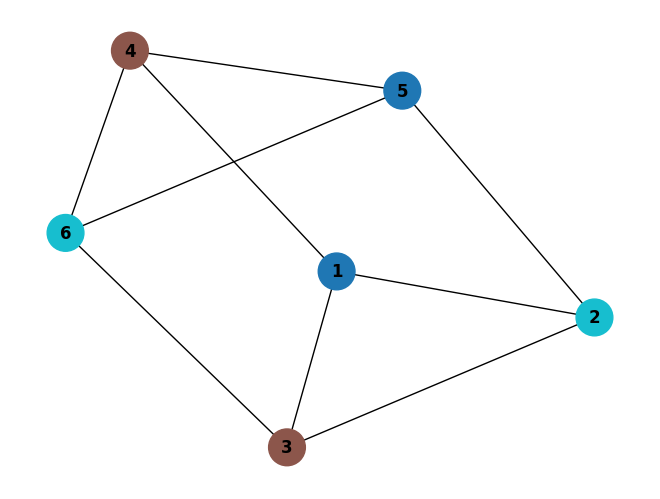

In [72]:
plot_coloring(graph_adv, colors_better)

Final Remarks:

> Greedy colouring is fast and simple

> It always produces a proper colouring

> It's quality depends on vertex order

> It is useful as a baseline or approximation method

The greedy colouring algorithm does not guarantee an optimal colouring. Different vertex orders may lead to different colourings and colour counts. This is why vertex ordering heuristics are often used in practice.